In [13]:
import random
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def generate_adjancency_matrix(num_nodes, density = 0.5):
    adj_matrix = [[0 for i in range(num_nodes)] for j in range(num_nodes)]
    
    current_density = 0
    
    while current_density < density:
        while True:
            i = random.randint(0,num_nodes-1)
            j = random.randint(0,num_nodes-1)
            
            if not adj_matrix[i][j]:
                adj_matrix[i][j] = 1
                current_density += 1/(num_nodes*num_nodes)
                break
    
    return adj_matrix

In [15]:
generate_adjancency_matrix(4)

[[1, 1, 0, 1], [0, 0, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1]]

In [16]:
def generate_control_points(num_points = 10):
    control_points = []
    
    while len(control_points) < num_points:
        control_points.append(random.random())
        
    return control_points

In [17]:
generate_control_points()

[0.8592806270727327,
 0.6465597153856425,
 0.06959934895380282,
 0.37937095358894535,
 0.3936441196360111,
 0.5638251789092461,
 0.036572536716861004,
 0.1424202275575227,
 0.4125891434135801,
 0.8583840234237691]

In [18]:
def generate_spline(control_points, n_points=100, noise=0):
    # Create x values for control points
    x = np.linspace(0, 1, len(control_points))

    # Create cubic spline
    cs = CubicSpline(x, control_points)

    # Generate N evenly spaced x values between 0 and 1
    x_new = np.linspace(0, 1, n_points)

    # Compute y values for these x values
    y_new = cs(x_new)
    
    # Introduce noise
    if noise != 0:
        noise_amount = np.random.normal(0, noise, size=y_new.shape)
        y_new = y_new + noise_amount

    return y_new

In [19]:
generate_spline(generate_control_points(20), 2000)

array([0.46562444, 0.48291736, 0.49985495, ..., 0.18636977, 0.18379079,
       0.18115804])

In [20]:
def generate_node_data(num_properties=1, num_records=100, num_control_points=10, noise=0):
    node_data = []
    
    while len(node_data) < num_properties:
        node_property = generate_spline(generate_control_points(num_control_points), num_records, noise)
        node_data.append(node_property)
        
    tranposed = [list(i) for i in zip(*node_data)]
        
    return tranposed
        

In [21]:
def array_to_dataframe(array_2d):
    df = pd.DataFrame(array_2d)
    return df

In [22]:
generated_node_data = generate_node_data(num_properties=3, num_records=200, num_control_points=5, noise=0.05)
generated_node_data

[[0.1405494225982851, 0.9563738086039052, -0.015034087792142603],
 [0.15041089045506897, 0.9281740938048952, 0.176181206474917],
 [0.15943905172052172, 0.8619617486721477, 0.1633243176696397],
 [0.14143592876782535, 0.8633047747282577, 0.23420024885660923],
 [0.11375586449907221, 0.9531895259262211, 0.20724952883520248],
 [0.19464369595754583, 0.9521471855952217, 0.21012714396811857],
 [0.22489276791966256, 0.9761530342570091, 0.25679654378262257],
 [0.4365407147658509, 0.9918380592488204, 0.21505903300754645],
 [0.245600086750449, 0.9124067934934932, 0.23806597849337696],
 [0.3691895813142372, 0.9614534098348486, 0.35411109680005304],
 [0.36694584277282827, 1.0140139809775566, 0.31146070944891424],
 [0.4652178177890939, 0.919228647334637, 0.2421919726136864],
 [0.43566875000342836, 0.9773570864288631, 0.19743001368455643],
 [0.4793447172871458, 1.0640173597483038, 0.3236977190031994],
 [0.5185882630263727, 1.0015473477239774, 0.29291925706537575],
 [0.4959515468580322, 1.0605103099705

In [23]:
generated_data = array_to_dataframe(generated_node_data)

<Axes: >

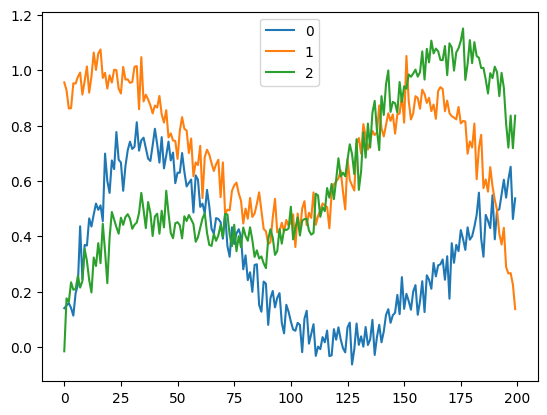

In [24]:
generated_data.plot.line()

In [27]:
def flatten_dataframe(df):
    df_flat = df.reset_index().melt(id_vars='index', var_name='column', value_name='value')
    return df_flat

In [30]:
flat_df = flatten_dataframe(generated_data)

In [34]:
def unflatten_dataframe(df_flat):
    df = df_flat.pivot(index='index', columns='column', values='value')
    df.reset_index(drop=True, inplace=True)
    df.columns.name = None
    return df

In [35]:
unflatten_dataframe(flat_df)

,0,1,2
0,0.140549,0.956374,-0.015034
1,0.150411,0.928174,0.176181
2,0.159439,0.861962,0.163324
3,0.141436,0.863305,0.234200
4,0.113756,0.953190,0.207250
...,...,...,...
195,0.540075,0.289036,0.807618
196,0.605358,0.265911,0.720668
197,0.651531,0.267503,0.836682
198,0.462936,0.225455,0.718550


In [36]:
def merge_melted_dfs(dfs):
    # Add 'entity' column to each DataFrame and concatenate them
    for i, df in enumerate(dfs):
        df['entity'] = i
    
    df_concat = pd.concat(dfs, ignore_index=True)
    return df_concat

In [37]:
generated_node_data_1 = generate_node_data(num_properties=3, num_records=200, num_control_points=5, noise=0.05)
generated_node_data_2 = generate_node_data(num_properties=3, num_records=200, num_control_points=5, noise=0.05)
generated_node_data_3 = generate_node_data(num_properties=3, num_records=200, num_control_points=5, noise=0.05)

In [39]:
generated_node_data_1 = array_to_dataframe(generated_node_data_1)
generated_node_data_2 = array_to_dataframe(generated_node_data_2)
generated_node_data_3 = array_to_dataframe(generated_node_data_3)

In [40]:
flat_df_1 = flatten_dataframe(generated_node_data_1)
flat_df_2 = flatten_dataframe(generated_node_data_2)
flat_df_3 = flatten_dataframe(generated_node_data_3)

In [41]:
dfs = [flat_df_1, flat_df_2, flat_df_3]

merge_melted_dfs(dfs)

,index,column,value,entity
0,0,0,0.739785,0
1,1,0,0.701591,0
2,2,0,0.744214,0
3,3,0,0.641718,0
4,4,0,0.726876,0
...,...,...,...,...
1795,195,2,0.433850,2
1796,196,2,0.388364,2
1797,197,2,0.434202,2
1798,198,2,0.376493,2


In [48]:
def generate_n_node_flat_data(num_nodes, num_records, num_properties, num_control_points, noise):
    flat_dfs = []
    
    while (len(flat_dfs)) < num_nodes:
        generated_node_data = generate_node_data(num_properties, num_records, num_control_points, noise)
        generated_node_data = array_to_dataframe(generated_node_data)
        flat_df = flatten_dataframe(generated_node_data)
        flat_dfs.append(flat_df)
        
    return merge_melted_dfs(flat_dfs)

In [49]:
generate_n_node_flat_data(5, 1000, 4, 10, 0.1)

,index,column,value,entity
0,0,0,0.612704,0
1,1,0,0.363344,0
2,2,0,0.427721,0
3,3,0,0.648797,0
4,4,0,0.414394,0
...,...,...,...,...
19995,995,3,-0.193864,4
19996,996,3,0.192428,4
19997,997,3,0.078388,4
19998,998,3,0.027194,4
